In [1]:
import numpy as np 
import pandas as pd
from scipy import stats
import statsmodels as sm
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('/media/jose/090f6b94-de30-4aaf-9f8a-4e18b120d7f6/bd/01. Simples/lending_club/acc.csv',dtype=str)

In [3]:
df.shape

(2260701, 151)

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723916800001,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.66,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
um = ['id']
varc = ['loan_amnt','annual_inc','fico_range_low','open_acc']
vard =['grade','emp_length','home_ownership','application_type','loan_status']

In [6]:
df = df[um+varc+vard]

In [7]:
df.head()

,id,loan_amnt,annual_inc,fico_range_low,open_acc,grade,emp_length,home_ownership,application_type,loan_status
0,68407277,3600.0,55000.0,675.0,7.0,C,10+ years,MORTGAGE,Individual,Fully Paid
1,68355089,24700.0,65000.0,715.0,22.0,C,10+ years,MORTGAGE,Individual,Fully Paid
2,68341763,20000.0,63000.0,695.0,6.0,B,10+ years,MORTGAGE,Joint App,Fully Paid
3,66310712,35000.0,110000.0,785.0,13.0,C,10+ years,MORTGAGE,Individual,Current
4,68476807,10400.0,104433.0,695.0,12.0,F,3 years,MORTGAGE,Individual,Fully Paid


In [8]:
for v in varc:
    df[v] = pd.to_numeric(df[v],errors='coerce')

In [9]:
df['loan_status'] = 1-df['loan_status'].isin(['Fully Paid','Current'])

In [10]:
df['loan_status'].value_counts(1)

loan_status
0    0.864806
1    0.135194
Name: proportion, dtype: float64

In [17]:
v,t = 'loan_amnt','home_ownership'

In [18]:
stats.kruskal(*[v.dropna() for s,v in df.groupby(t)[v]])

KruskalResult(statistic=73448.23501164715, pvalue=0.0)

In [22]:
df.groupby(t)[v].mean()

home_ownership
ANY         13347.740964
MORTGAGE    16693.072360
NONE        13643.981481
OTHER       10810.164835
OWN         14371.201745
RENT        13196.431086
Name: loan_amnt, dtype: float64

In [19]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [20]:
aux = df[[t,v]].copy().dropna().reset_index(drop=True).sample(10000)

In [21]:
tukey_results = pairwise_tukeyhsd(aux[v],aux[t])
print(tukey_results)


      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1   group2   meandiff  p-adj    lower      upper    reject
----------------------------------------------------------------
     ANY MORTGAGE   9792.215 0.1335  -1836.159  21420.589  False
     ANY      OWN   7462.522 0.3524 -4181.5249  19106.569  False
     ANY     RENT  5982.3716  0.549 -5646.9619  17611.705  False
MORTGAGE      OWN -2329.6929    0.0 -3096.7584 -1562.6275   True
MORTGAGE     RENT -3809.8434    0.0 -4305.7823 -3313.9045   True
     OWN     RENT -1480.1505    0.0 -2261.6258  -698.6752   True
----------------------------------------------------------------


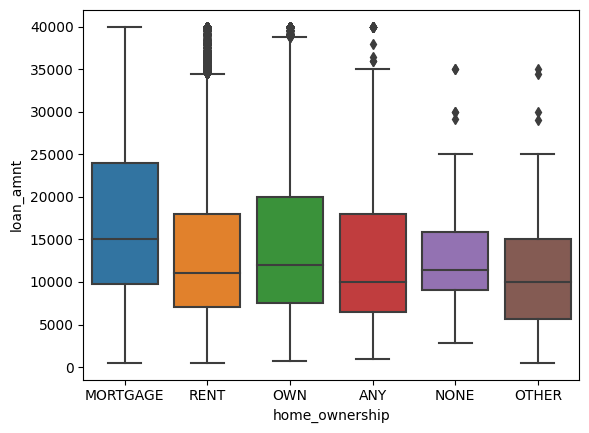

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# generar la gráfica de cajas y bigotes
sns.boxplot(x=t, y=v, data=df)

# mostrar la gráfica
plt.show()
